### Importing data

In [63]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
# Importing the dataset
df = pd.read_excel('exam.xlsx', sheet_name='Ads')

In [65]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Missing data

In [67]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [68]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Outliers

In [69]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [70]:
# Drop useless
df = df.drop(['User ID'], axis='columns', inplace=False)

In [71]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [72]:
# Outliers
df = outliers(df)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


### Encoding

In [73]:
# Cheking categorical data
dfs = df[['Gender']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Gender,2,"[Male, Female]",object


In [74]:
# Encoding
Gen = {'Male':0,'Female':1}
df['Gender'] = df['Gender'].map(Gen)
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


### Correlation

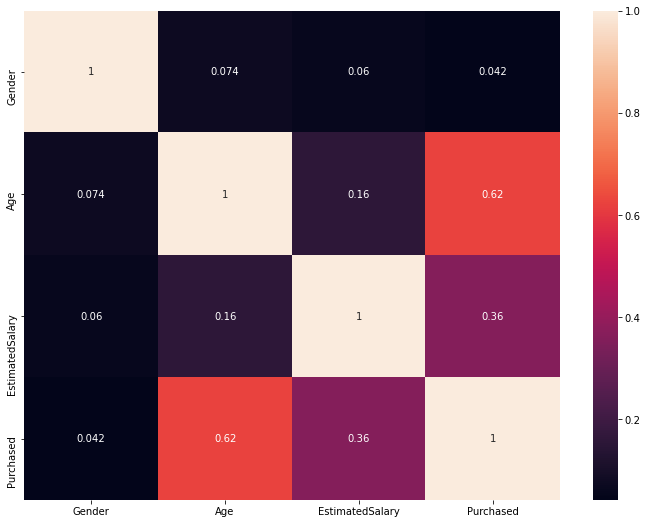

In [75]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Splitting

In [76]:
# Splitting the dataset into the Training set and Test set

f = ['Age','EstimatedSalary']
X = df[f]
y = df['Purchased']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Выбираю для 'у' - 'Purchased', так как скорее всего заказчика будет интересовать именно эти значения, а для 'х' - 'Age' и 'EstimatedSalary', так как у них адекватная корреляция с 'Purchased'.

In [77]:
df.to_csv('prepeared.csv', sep=',', index=False)

### Logistic Regression

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

### Feature Selection


In [79]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.382154
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.422     
Dependent Variable: Purchased        AIC:              248.5786  
Date:               2022-01-04 11:23 BIC:              256.1153  
No. Observations:   320              Log-Likelihood:   -122.29   
Df Model:           1                LL-Null:          -211.70   
Df Residuals:       318              LLR p-value:      8.7633e-41
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
          Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        2.2971      0.2852    8.0545    0.0000    1.7381    2.8560
x2        1.4408      0.2259    6.3774    0.0000    0.

In [80]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

2
[ True  True]
[1 1]


### Fitting Logistic Regression

In [82]:
# Leaving only Selected Features
X_train_select=X_train[:,[True,  True]]
X_test_select=X_test[:,[True,  True]]

In [83]:
X_train_select

array([[ 0.3910582 ,  2.30610793],
       [ 0.77199769, -1.13266381],
       [-1.41840439, -0.22153626],
       [ 0.01011871, -0.57423079],
       [-1.79934388,  0.4250704 ],
       [-0.27558591,  0.04298465],
       [ 0.86723256,  1.24802432],
       [-1.32316952, -0.36849231],
       [-0.27558591, -0.60362201],
       [-1.70410901, -0.63301322],
       [-1.79934388, -1.30901108],
       [ 0.77199769,  0.74837372],
       [-1.13269977, -1.63231441],
       [-0.46605566, -0.80936049],
       [ 1.4386418 ,  0.33689676],
       [-1.0374649 , -0.36849231],
       [ 0.48629307,  1.7182837 ],
       [-1.13269977,  0.27811434],
       [-1.60887413, -0.0745802 ],
       [-0.18035104, -0.30970989],
       [ 2.10528591, -0.72118685],
       [-1.13269977, -1.57353198],
       [-0.94223002, -0.98570775],
       [ 1.53387667,  0.98350341],
       [ 0.86723256, -1.39718472],
       [-1.22793464,  0.24872313],
       [ 0.29582332, -0.54483958],
       [-1.70410901, -1.01509897],
       [-0.27558591,

In [84]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [85]:
# Predicting the Test set results
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(2)

0.84

In [86]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  7]
 [ 6 17]]


### Visualising

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


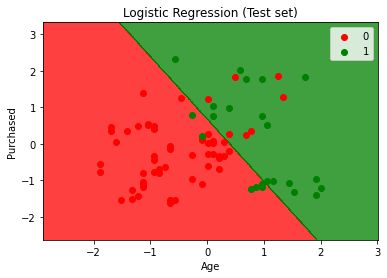

In [91]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.legend()
plt.show()

In [92]:
print(cm)

[[50  7]
 [ 6 17]]


In [94]:
lr.score(X_test_select,y_test).round(2)

0.84

Точность модели 84%, вероятностиошибок первого и второго типа почти одинаковы